In [32]:
import yfinance as yf
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from scipy.fft import fft

In [33]:
# BBAS3.SA

# BBDC4.SA
# ticker = "SPY"
# ticker = "VALE3.SA"
# ticker = "PETR4.SA"
# ticker = "VALE3.SA"
# ticker2 = "^BVSP"

data = yf.download(ticker, start="2021-01-01", end="2023-07-10")
data['Past Days'] = data['Adj Close'].shift(10)
data['Past Return'] = data['Adj Close'] / data['Past Days'] - 1
data = data.dropna()
print(data.head(20))

time_series = np.array(data['Past Return'])

[*********************100%%**********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2021-01-18  93.900002  95.639999  93.550003  94.309998  68.796906  22667600   
2021-01-19  94.500000  94.570000  91.900002  94.059998  68.614548  27155400   
2021-01-20  95.000000  95.139999  90.830002  92.320000  67.345261  20480000   
2021-01-21  92.300003  96.099998  92.139999  93.360001  68.103920  25983400   
2021-01-22  91.989998  93.809998  90.989998  93.169998  67.965317  25814300   
2021-01-26  92.989998  94.160004  91.360001  91.750000  66.929459  24921600   
2021-01-27  90.389999  91.180000  88.199997  89.199997  65.069290  32419700   
2021-01-28  88.199997  91.349998  88.099998  91.099998  66.455307  35900800   
2021-01-29  89.989998  90.849998  87.790001  87.949997  64.157440  31481600   
2021-02-01  90.010002  91.269997  88.580002  91.269997  66.579

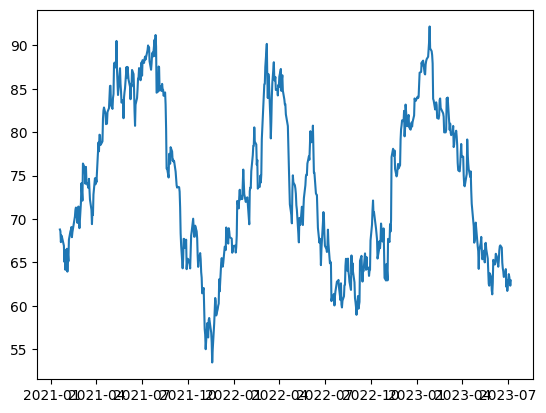

In [34]:
plt.plot(data['Adj Close'])

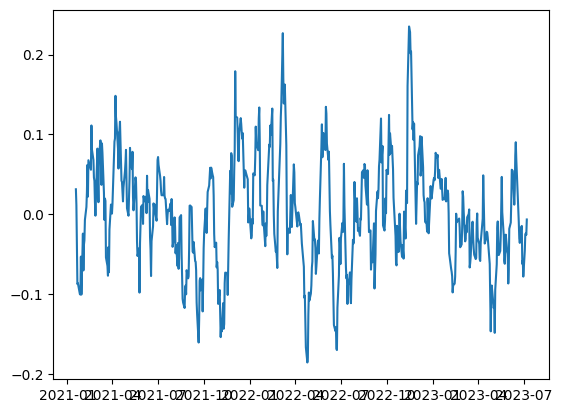

In [35]:


plt.plot(data['Past Return'])
data.to_csv('/Users/gabrielassuncao/Desktop/analise_senoide.csv')

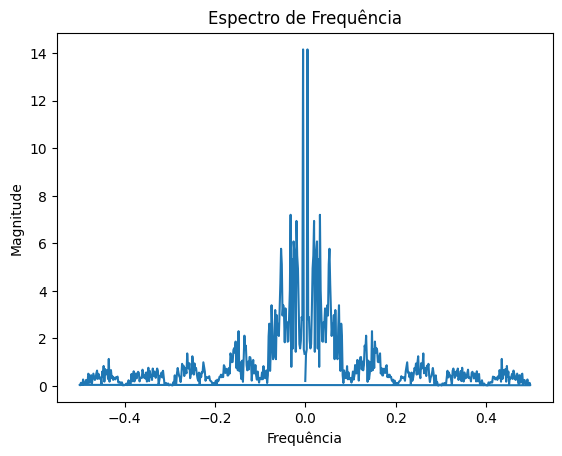

In [36]:
def decompose_time_series(time_series):
    # Calcula a FFT da série temporal
    fft_result = np.fft.fft(time_series)

    # Calcula as frequências correspondentes
    freq = np.fft.fftfreq(len(time_series))

    # Retorna o resultado da FFT e as frequências
    return fft_result, freq

# Exemplo de uso da função
fft_result, freq = decompose_time_series(time_series)
# Plotar o espectro de frequência
plt.plot(freq, np.abs(fft_result))
plt.title("Espectro de Frequência")
plt.xlabel("Frequência")
plt.ylabel("Magnitude")
plt.show()


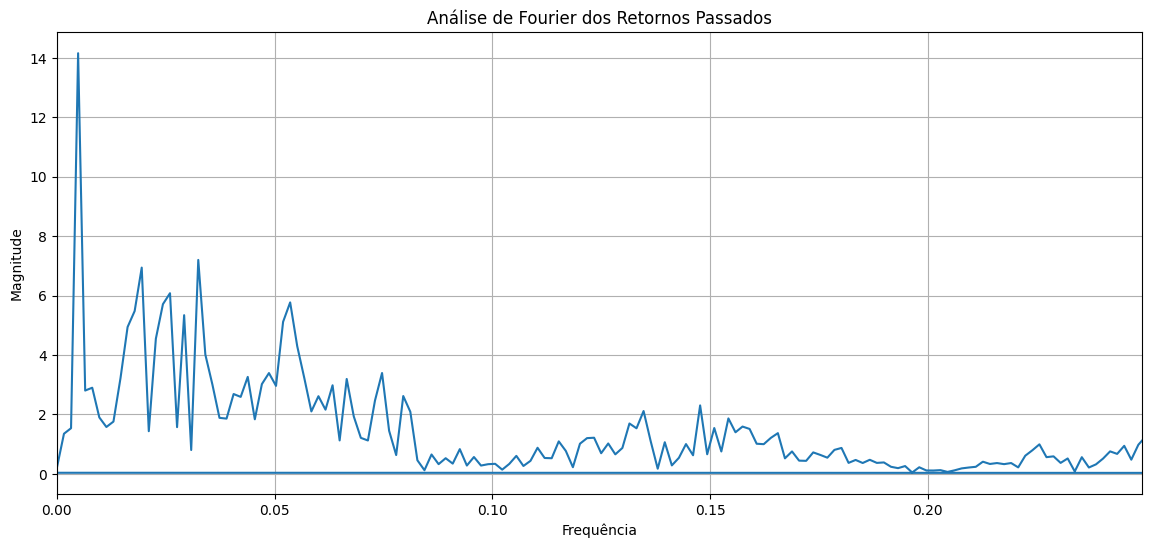

In [41]:
# Convertendo a coluna "Past Return" para um array NumPy antes de aplicar a FFT
past_return_array = data['Past Return'].to_numpy()

# Realizando a Transformada Rápida de Fourier (FFT) novamente
fft_values = fft(past_return_array)
frequencies = np.fft.fftfreq(len(fft_values))
magnitude = np.abs(fft_values)

# Preparando o gráfico
plt.figure(figsize=(14, 6))
plt.plot(frequencies, magnitude)
plt.title('Análise de Fourier dos Retornos Passados')
plt.xlabel('Frequência')
plt.ylabel('Magnitude')
plt.grid(True)

# Mostrando apenas frequências positivas
plt.xlim([0, max(frequencies)/2])

plt.show()